In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys, os
sys.path.insert(0, '../../../../FISH-annotation/fishanno')
import clus, param, autocrop, clus
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from QuantiusAnnotation import QuantiusAnnotation
import warnings
warnings.filterwarnings('ignore')

from unidip import UniDip
import unidip.dip as dip

In [ ]:
clustering_params = ['AffinityPropagation', -350]

In [18]:
json_path = 'Spot_density.json'
image_names = []
for snr in [5, 10]:
    for density in np.arange(0.002, 0.01, 0.002):
        image_names.append('snr_%s_0_density_%s_spot_img.png' % (snr, density))

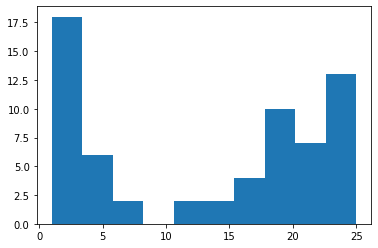

0.008991008991008992


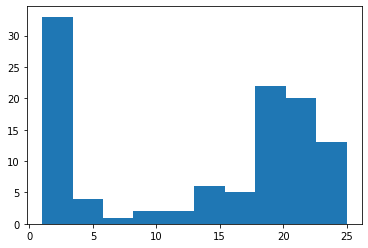

0.000999000999000999


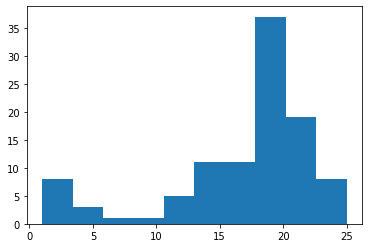

0.48151848151848153


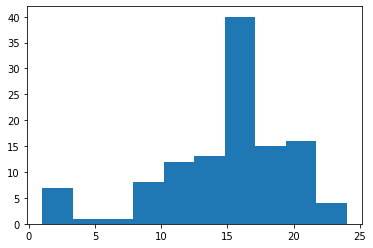

0.46853146853146854


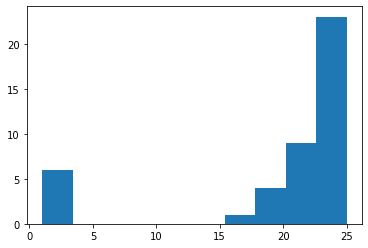

0.3206793206793207


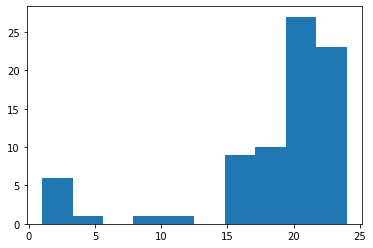

0.052947052947052944


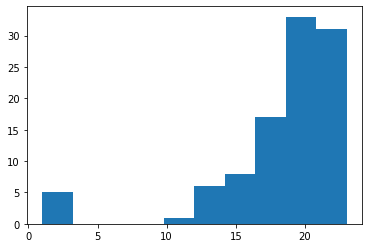

0.18981018981018982


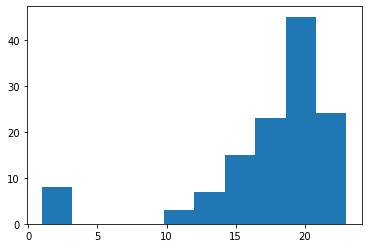

0.33666333666333664


In [22]:
for image_name in image_names:
    qa = QuantiusAnnotation(json_path, image_name)
    sa = SpotAnnotationAnalysis(qa)
    anno_all = qa.df()

    # cluster annotations
    clusters = sa.get_clusters(anno_all, clustering_params)  
    
    # sort clusters 
    total_list = []
    for i in range(len(clusters.index)):
        row = clusters.iloc[[i]]
        members = row.iloc[0]['members']
        worker_list = [member[3] for member in members]
        num_members = len(np.unique(worker_list))
        total_list.append(num_members)
    plt.figure()
    plt.hist(total_list)
    plt.show()
    
    data = np.msort(total_list)
    dip_test_p_value = dip.diptst(data)[1]
    print(dip_test_p_value)
    

In [ ]:
# tissue synth dataset

In [46]:
clustering_params = ['AffinityPropagation', -350]
json_path = 'SynthTests_tissue.json'
image_names = []
for snr in [5, 10, 20]:
    for nspots in [50, 100, 150]:
        image_names.append('MAX_ISP_300_1_nspots%s_spot_sig1.75_snr%s_2.5spot_img.png' % (nspots, snr))        
        

In [47]:
image_names

['MAX_ISP_300_1_nspots50_spot_sig1.75_snr5_2.5spot_img.png',
 'MAX_ISP_300_1_nspots100_spot_sig1.75_snr5_2.5spot_img.png',
 'MAX_ISP_300_1_nspots150_spot_sig1.75_snr5_2.5spot_img.png',
 'MAX_ISP_300_1_nspots50_spot_sig1.75_snr10_2.5spot_img.png',
 'MAX_ISP_300_1_nspots100_spot_sig1.75_snr10_2.5spot_img.png',
 'MAX_ISP_300_1_nspots150_spot_sig1.75_snr10_2.5spot_img.png',
 'MAX_ISP_300_1_nspots50_spot_sig1.75_snr20_2.5spot_img.png',
 'MAX_ISP_300_1_nspots100_spot_sig1.75_snr20_2.5spot_img.png',
 'MAX_ISP_300_1_nspots150_spot_sig1.75_snr20_2.5spot_img.png']

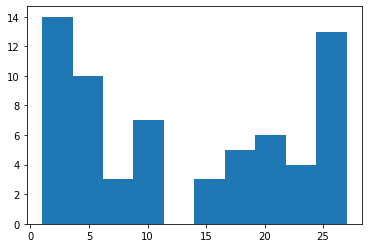

0.24175824175824176


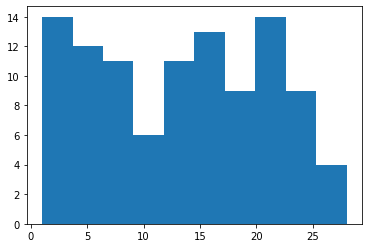

0.8451548451548452


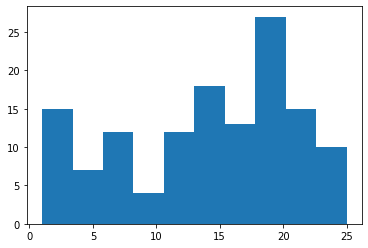

0.977022977022977


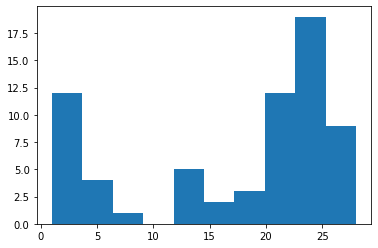

0.4855144855144855


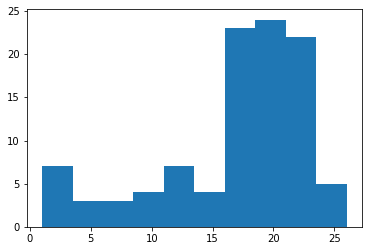

0.2817182817182817


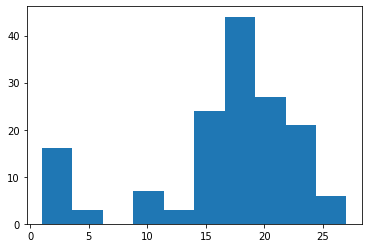

0.2817182817182817


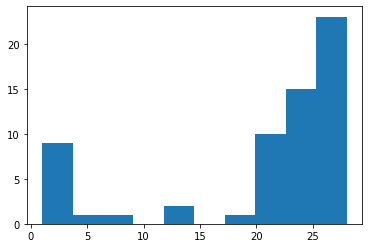

0.7282717282717283


In [ ]:
for image_name in image_names:
    qa = QuantiusAnnotation(json_path, image_name)
    sa = SpotAnnotationAnalysis(qa)
    anno_all = qa.df()

    # cluster annotations
    clusters = sa.get_clusters(anno_all, clustering_params)  
    
    # sort clusters 
    total_list = []
    for i in range(len(clusters.index)):
        row = clusters.iloc[[i]]
        members = row.iloc[0]['members']
        worker_list = [member[3] for member in members]
        num_members = len(np.unique(worker_list))
        total_list.append(num_members)
    plt.figure()
    plt.hist(total_list)
    plt.show()
    
    data = np.msort(total_list)
    dip_test_p_value = dip.diptst(data)[1]
    print(dip_test_p_value)
    

dip_test_p_value < 0.05 indicates that the data is not unimodal.

In [21]:
data = np.msort(data)
dip_test_p_value = dip.diptst(data)[1]
dip_test_p_value

0.000999000999000999